In [1]:
import pandas as pd
import numpy as np
from arima import ARIMAModel, ARIMATools
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("shampoo_sales.csv")
df

# df = df[['Price', 'Close']]
# df.drop([0, 1], inplace=True)


,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [3]:
series = df['Sales']

In [4]:
series.values

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

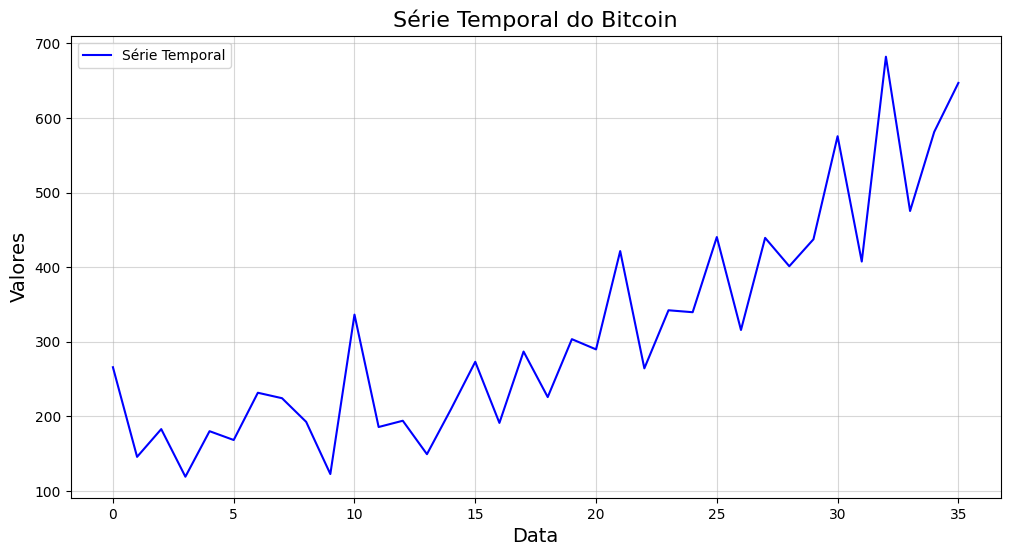

In [5]:
# Plota a série temporal
ARIMATools.plot_series(series, title='Série Temporal do Bitcoin')


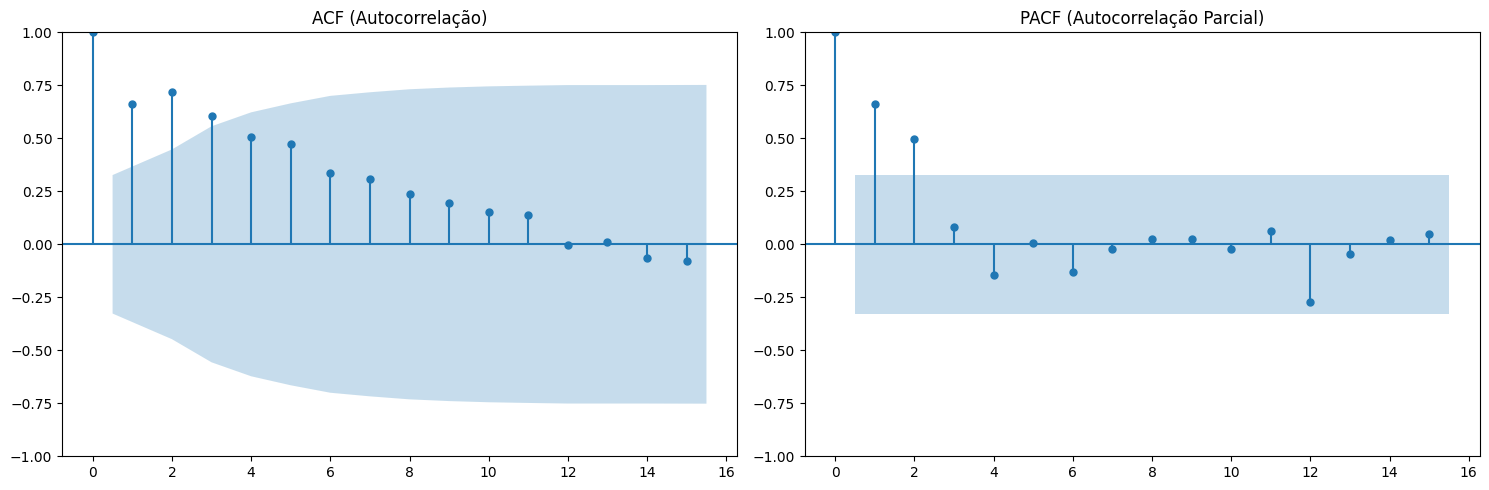

In [6]:
# Plota ACF e PACF
ARIMATools.plot_acf_pacf(series, lags=15)

In [7]:

# Instanciando o modelo
model = ARIMAModel()

In [8]:
ARIMATools.estimate_ar_ma(series, 0, 1)
ARIMATools.find_d(series, 3)

Grau de diferenciação ideal (d): 1


In [9]:
model.fit(series, p=3, d=1, q=2)

d:\Gerorsch\PPGIA\time_series\projeto_final\time_series_PPGIA\arima4.py:101: RuntimeWarning: overflow encountered in square
  mse = np.mean((data[max(self.p, self.q):] - np.array(predictions))**2)
c:\Users\gjque\anaconda3\envs\sklearn-env\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [10]:
print("Parâmetros iniciais:")
print("AR (phi):", model.params_ar)
print("MA (theta):", model.params_ma)

Parâmetros iniciais:
AR (phi): [0.2416538533593989, -0.4143652859570713, -0.609477736480345]
MA (theta): [-1.7515117047452664, 2.129670167801044]


Previsões: [745.0675221435929, 675.0176773522797, 582.4472350459316, 523.8398245419264, 592.5986577376764, 692.1867043080052, 724.631213519321, 645.8965270235582, 556.2213473807108, 545.437812880458, 630.5363509252692, 705.7466652261135]


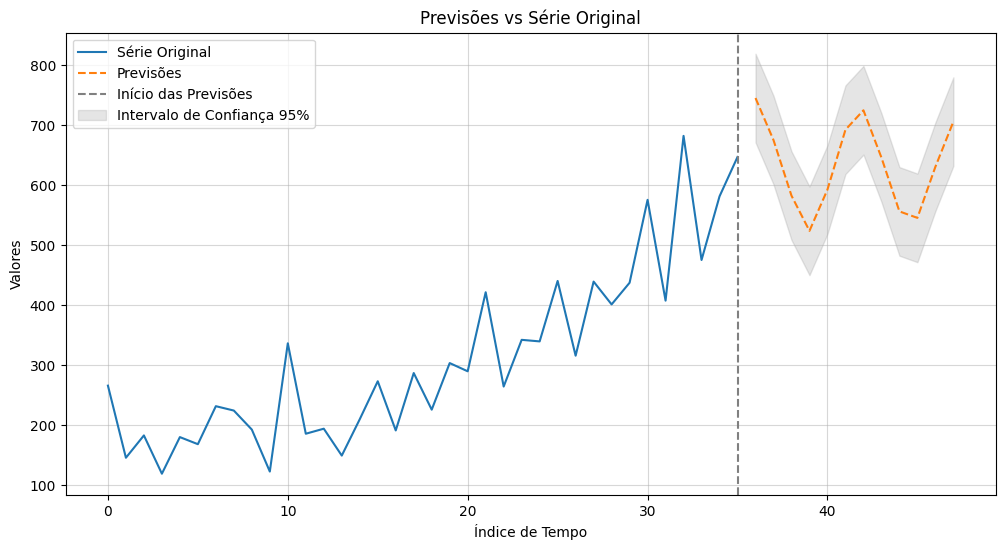

In [11]:

# Realiza previsões
forecast = model.predict(steps=12)
print("Previsões:", forecast)

# Plota a série temporal e as previsões
lower_bound, upper_bound = ARIMATools.calculate_confidence_intervals(forecast, model.residuals)
ARIMATools.plot_forecast(pd.Series(series), forecast, steps=12, lower_bound=lower_bound, upper_bound=upper_bound)

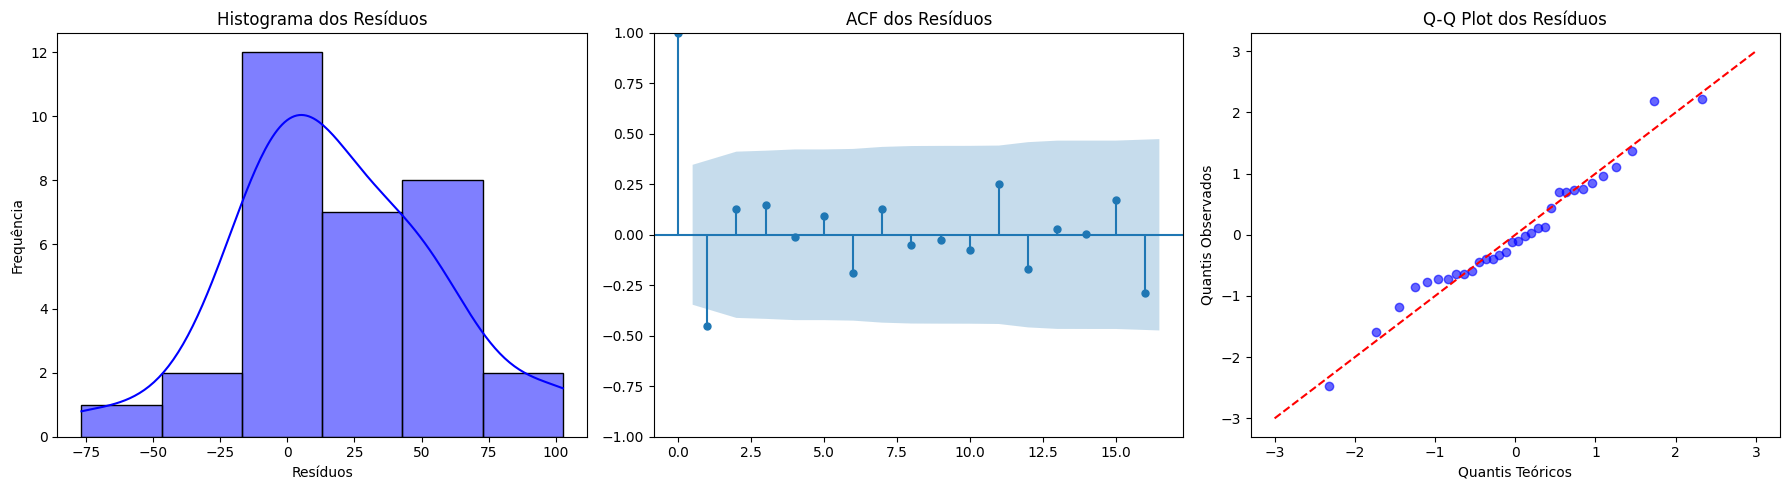

{'mean': 17.69012065053144,
 'std_dev': 38.25282227602637,
 'min': -76.70383728867081,
 'max': 102.6070052250007,
 'skewness': 0.16504169598104093,
 'kurtosis': 0.6802066923912737}

In [12]:
ARIMATools.analyze_residuals(model.residuals)